<a href="https://colab.research.google.com/github/aemani/Python-Code-samples/blob/master/Installation_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint

###  Run the below code snippet to setup the colab

cv2, BeautifulSoup, pandas, numpy, sklearn, scipy, matplotlib, seaborn and NLTK are already installed in Colab server by default. The other required packages will be installed by the setup scripts.


In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="Introduction" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install gensim")
    ipython.magic("sx pip install librosa")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/IIIT_TS_IMG.png")
   # ipython.magic("sx unzip Installation_check_data.zip?dl=1")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/weight-height.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/cello.wav")
    #ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp5/AIML_DS_BEZ
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
!ls

cello.wav  IIIT_TS_IMG.png  Introduction.ipynb	sample_data  weight-height.csv


In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import cv2
from scipy import stats
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt
from scipy import linalg

#### Load data, confirm pandas installation

In [0]:
DataFrame = pd.read_csv('weight-height.csv')

In [0]:
DataFrame.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
DataArray_height = DataFrame.Height.values
DataArray_Weight = DataFrame.Weight.values
DataArray_Gender = DataFrame.Gender.values

#### Find means and confirm numpy Installation

In [0]:
mean_height = np.mean(DataArray_height)
mean_weight = np.mean(DataArray_Weight)
#
mean_height, mean_weight

(66.36755975482124, 161.44035683283076)

#### Find Eigen vectors, Confirm scipy installation

In [0]:
A = np.array([[1,2],[3,4]])
eigen_values, eigen_vector = linalg.eig(A)
eigen_values, eigen_vector

(array([-0.37228132+0.j,  5.37228132+0.j]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

#### Scatter Plot of the data, confirm Matplotlib installation

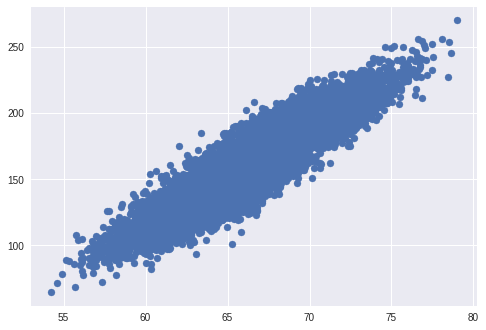

In [0]:
plt.scatter(DataArray_height, DataArray_Weight)

#### Load data from remote respository using Scikit Learn

In [0]:
from sklearn import datasets

In [0]:
iris = datasets.load_iris()
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### Identify unique tokens and confirm gensim

In [0]:
from gensim import corpora

In [0]:
stoplist = set('for a of the and to in'.split())

In [0]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

In [0]:
texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(35 unique tokens: ['abc', 'applications', 'computer', 'human', 'interface']...)


#### Load the image and show it to confirm opencv

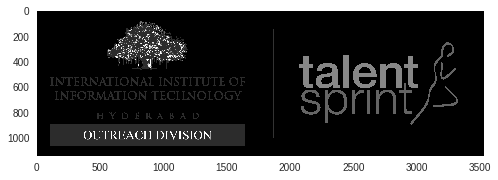

In [0]:
import cv2
img = cv2.imread('IIIT_TS_IMG.png',0)
plt.grid(False)
plt.imshow(img, cmap='gray')

#### Plot the wave form of the audio and confirm the librosa

In [0]:
import librosa.display

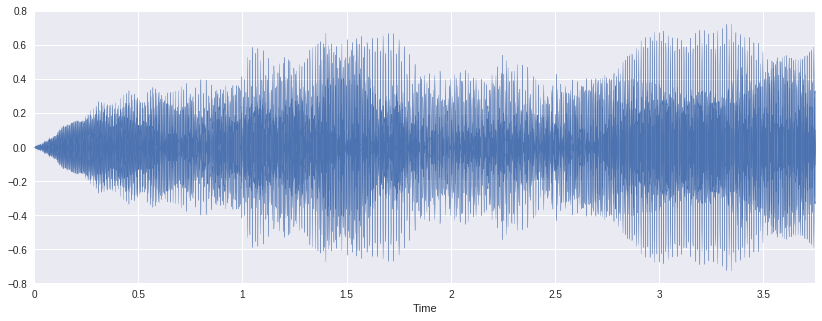

In [0]:
x, sr = librosa.load('cello.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#### Download the punkt corpora and confirm the NLTK

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Draw a box plot and confirm seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


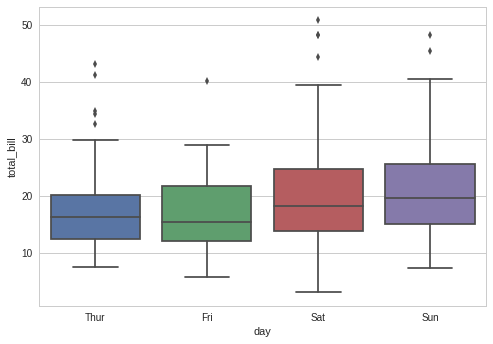

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips);

#### pretty print HTML to confirm the BeautifulSoup

In [0]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names
˓
→
were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""

In [0]:
from bs4 import BeautifulSoup
BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names
˓
→
were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


#### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "testing" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "No" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7659
Date of submission:  24 Dec 2018
Time of submission:  08:47:00
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
